<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url_data="https://raw.githubusercontent.com/EderReisS/Python_Machine_Learning/main/input_Files/Credit.csv"

In [3]:
df=pd.read_csv(url_data)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [5]:
df.iloc[:,3].unique().tolist()

['radio/tv',
 'education',
 'furniture/equipment',
 "'new car'",
 "'used car'",
 'business',
 "'domestic appliance'",
 'repairs',
 'other',
 'retraining']

In [24]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [41]:
df['purpose'].unique()

array(['radio/tv', 'education', 'furniture/equipment', "'new car'",
       "'used car'", 'business', "'domestic appliance'", 'repairs',
       'other', 'retraining'], dtype=object)

In [68]:
class q_sidekick():
    def agg_quantitative(data: pd.DataFrame, var: str = 'credit_amount') -> pd.DataFrame:
        quali_var = 'job'
        quanti_var = var
                
        df_agg =df.groupby(by=quali_var).agg(
            {quanti_var:['mean','sum','std','median','count']
            }
        ).round(2)
        
        return df_agg
    
    def graph_plot(data: pd.DataFrame, var: str = 'credit_amount') -> None:
        gaph = plt.figure(figsize=(15, 10))
        sns.boxplot(data = df, x = 'job', y = var, hue = 'class')
        plt.savefig('graph.jpeg')
        
        

In [67]:
type(figura)

matplotlib.figure.Figure

In [59]:
q_sidekick.agg_quantitative(data=df)

credit_amount                                
                                     mean      sum      std  median count
job                                                                      
'high qualif/self emp/mgmt'       5435.49   804453  3914.66  4459.0   148
'unemp/unskilled non res'         2745.14    60393  3168.67  1416.0    22
'unskilled resident'              2358.52   471704  2062.26  1622.0   200
skilled                           3070.97  1934708  2444.54  2324.0   630

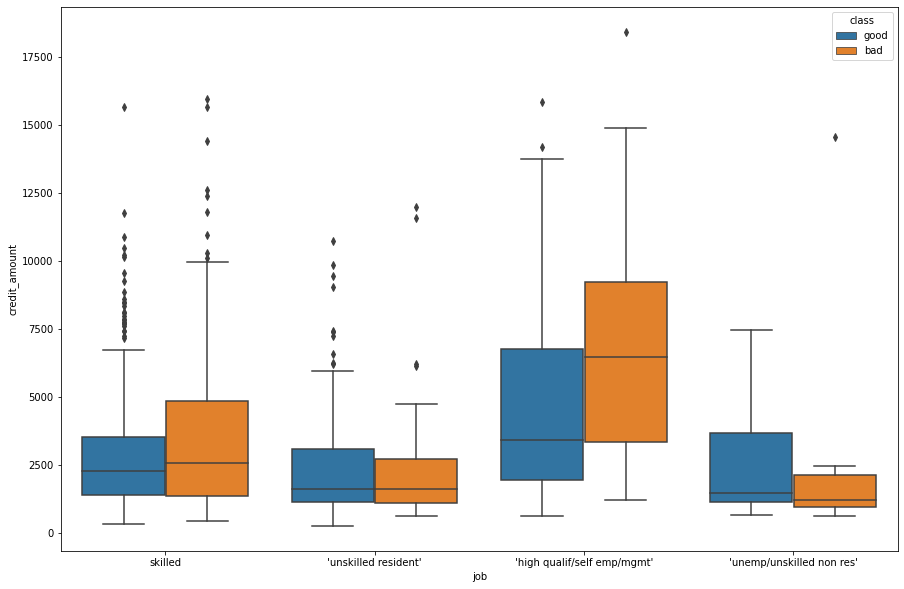

In [69]:
a=q_sidekick.graph_plot(data=df)

In [71]:
type(a)

NoneType

In [36]:
quali_var='job'
quanti_var='credit_amount'
name_agg=f'{quanti_var}'

df_agg=df.groupby(by=quali_var).agg(
    {quanti_var:['mean','sum','std','median','count']
    }
).round(2)
df_agg.to_json(f'{name_agg}.json', orient='columns')
df_agg.to_csv(f'{name_agg}.csv')

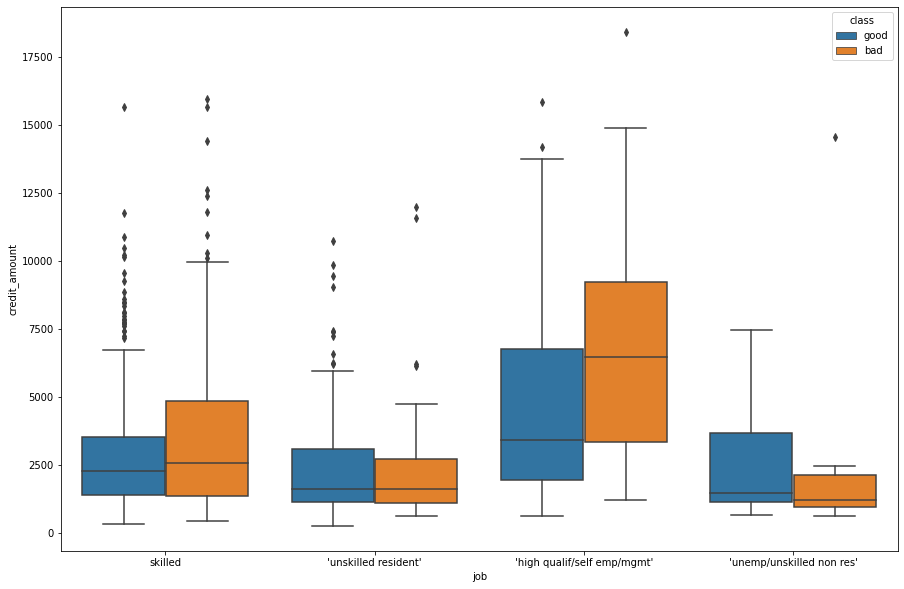

In [55]:
figura = plt.figure(figsize=(15, 10))
sns.boxplot(data = df, x = 'job', y = 'credit_amount', hue='class')

plt.savefig('grafico.png')
plt.show()
